In [1]:
rm(list = ls())
setwd("Z:\\Kimiya\\Multiple outcome exposure modeling\\Prepare result paper multivariate")

library(ggpubr)
library(tidyverse)
library(lubridate)

##### Read Data #####
# Multivariate datasets
MXGBoostData <- read.csv("Prediction all year mahalanobis - MXGBoost.csv")
MRFData <- read.csv("Prediction all year mahalanobis - MRF.csv")
# Univariate datasets
# CA
RFData_CA <- read.csv("Prediction ca all years - RF.csv") %>%
  rename(ca_pred_RF = pred) %>%
  select(-obs)

XGBoostData_CA <- read.csv("Prediction ca all years - XGBoost.csv") %>%
  rename(ca_pred_XGBoost = pred) %>%
  select(-obs)
#EC
RFData_EC <- read.csv("Prediction ec all years - RF.csv") %>%
  rename(ec_pred_RF = pred) %>%
  select(-obs)

XGBoostData_EC <- read.csv("Prediction ec all years - XGBoost.csv") %>%
  rename(ec_pred_XGBoost = pred) %>%
  select(-obs)
# SI
RFData_SI <- read.csv("Prediction si all years - RF.csv") %>%
  rename(si_pred_RF = pred) %>%
  select(-obs)

XGBoostData_SI <- read.csv("Prediction si all years - XGBoost.csv") %>%
  rename(si_pred_XGBoost = pred) %>%
  select(-obs)
# OS4
RFData_SO4 <- read.csv("Prediction so4 all years - RF.csv") %>%
  rename(so4_pred_RF = pred) %>%
  select(-obs)

XGBoostData_SO4 <- read.csv("Prediction so4 all years - XGBoost.csv") %>%
  rename(so4_pred_XGBoost = pred) %>%
  select(-obs)
##### End #####

##### Merge datasets #####
TotalData <- MXGBoostData %>% # Multivariate XGBoost model
  rename(ca_pred_MXGBoost = ca_pred, ec_pred_MXGBoost = ec_pred,
         si_pred_MXGBoost = si_pred, so4_pred_MXGBoost = so4_pred) %>%
  select(-c(ca_obs, ec_obs, si_obs, so4_obs)) %>%
  left_join(MRFData, by = c("date", "site_id")) %>% # Multivariate Random Forest
  rename(ca_pred_MRF = ca_pred, ec_pred_MRF = ec_pred,
         si_pred_MRF = si_pred, so4_pred_MRF = so4_pred) %>%
  left_join(RFData_CA, by = c("date", "site_id")) %>% 
  left_join(XGBoostData_CA, by = c("date", "site_id")) %>% 
  left_join(RFData_EC, by = c("date", "site_id")) %>% 
  left_join(XGBoostData_EC, by = c("date", "site_id")) %>% 
  left_join(RFData_SI, by = c("date", "site_id")) %>% 
  left_join(XGBoostData_SI, by = c("date", "site_id")) %>% 
  left_join(RFData_SO4, by = c("date", "site_id")) %>% 
  left_join(XGBoostData_SO4, by = c("date", "site_id")) %>%
  mutate(Year = year(date)) %>%
  mutate(Month = month(date))

Warning message:
"package 'ggpubr' was built under R version 4.3.2"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'tibble' was built under R version 4.3.2"
Warning message:
"package 'tidyr' was built under R version 4.3.2"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'purrr' was built under R version 4.3.2"
Warning message:
"package 'dplyr' was built under R version 4.3.2"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ───────────────────────────

In [8]:
TracePlt <- function(comp = "ca", Mod = "MXGBoost", tit = Mod) {
  R2YearMonth <- TotalData %>%
    rename(Obs = paste0(comp,"_obs"),
           Pred = paste0(comp, "_pred_",Mod)) %>%
    group_by(Year, Month) %>%
    summarise(R2 = cor(Obs, Pred)^2,
              MeanObs = mean(Obs),
              MeanExp = mean(Pred), .groups = "drop") %>%
    mutate(Yearlab = ifelse(Month == 1, Year, NA))
  
  M <- lm(MeanObs ~ MeanExp, data = R2YearMonth)
  R2VAL <- round(summary(M)$r.squared, 2)
  
  RMSEVAl <- R2YearMonth %>%
    ungroup() %>%
    mutate(Diff2 = (MeanObs - MeanExp)^2) %>%
    summarise(RMSE = round(sqrt(mean(Diff2)),2))
  
  plot(R2YearMonth$MeanObs, type = 'l', col = "black", lwd = 2, xaxt = "n",
       xlab = "", ylab = toupper(comp), main = Mod)
  lines(R2YearMonth$MeanExp, col = "dodgerblue1", lwd = 2)
  axis(side = 1, at = which(!is.na(R2YearMonth$Yearlab)),
       labels = R2YearMonth$Yearlab[which(!is.na(R2YearMonth$Yearlab))])
  par(xpd = T)
  legend("bottomleft", inset = c(0,1), ncol = 1, bty = 'n',
         paste0("R-squared:",R2VAL,"    RMSE:",RMSEVAl), cex = 1.2)
  par(xpd = F)

  
}

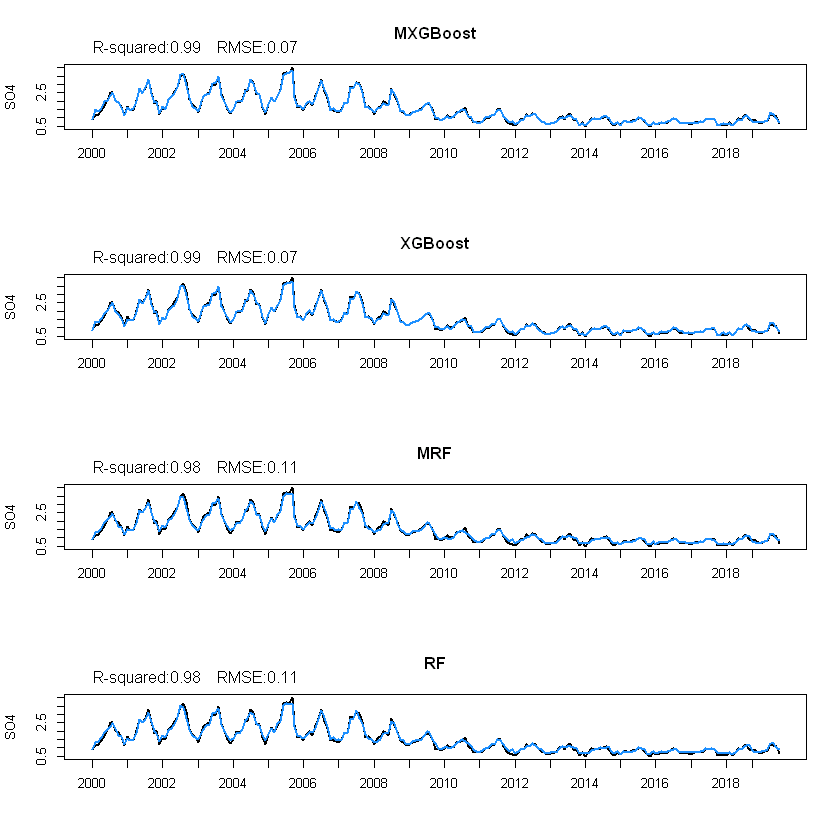

In [9]:
par(mfrow = c(4,1))
TracePlt(comp = "so4",  Mod = "MXGBoost")
TracePlt(comp = "so4",  Mod = "XGBoost")
TracePlt(comp = "so4",  Mod = "MRF")
TracePlt(comp = "so4",  Mod = "RF")

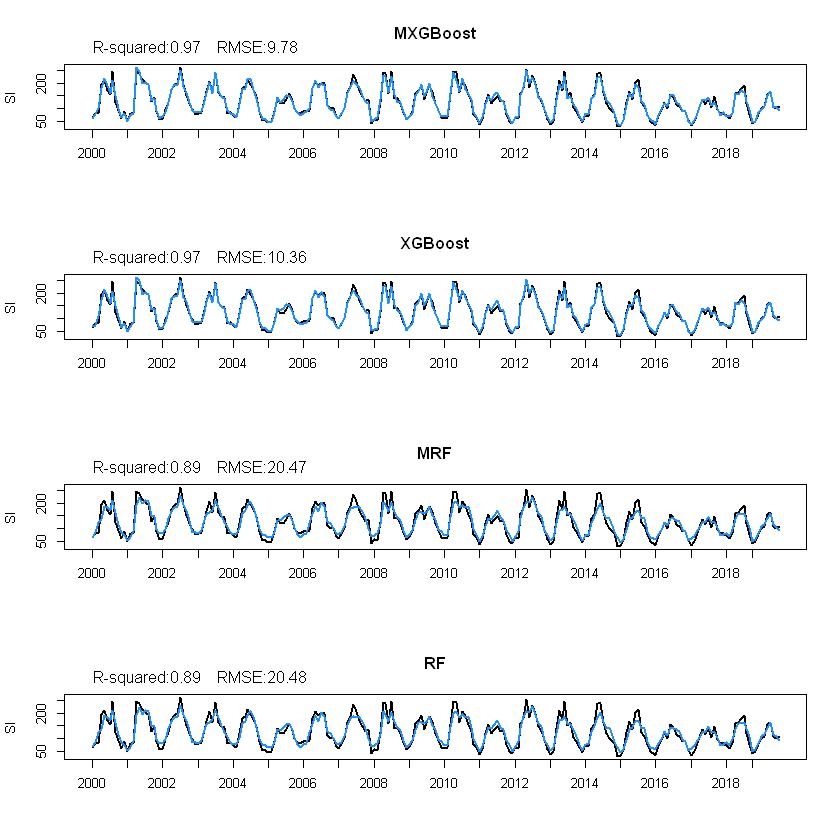

In [10]:
par(mfrow = c(4,1))
TracePlt(comp = "si",  Mod = "MXGBoost")
TracePlt(comp = "si",  Mod = "XGBoost")
TracePlt(comp = "si",  Mod = "MRF")
TracePlt(comp = "si",  Mod = "RF")

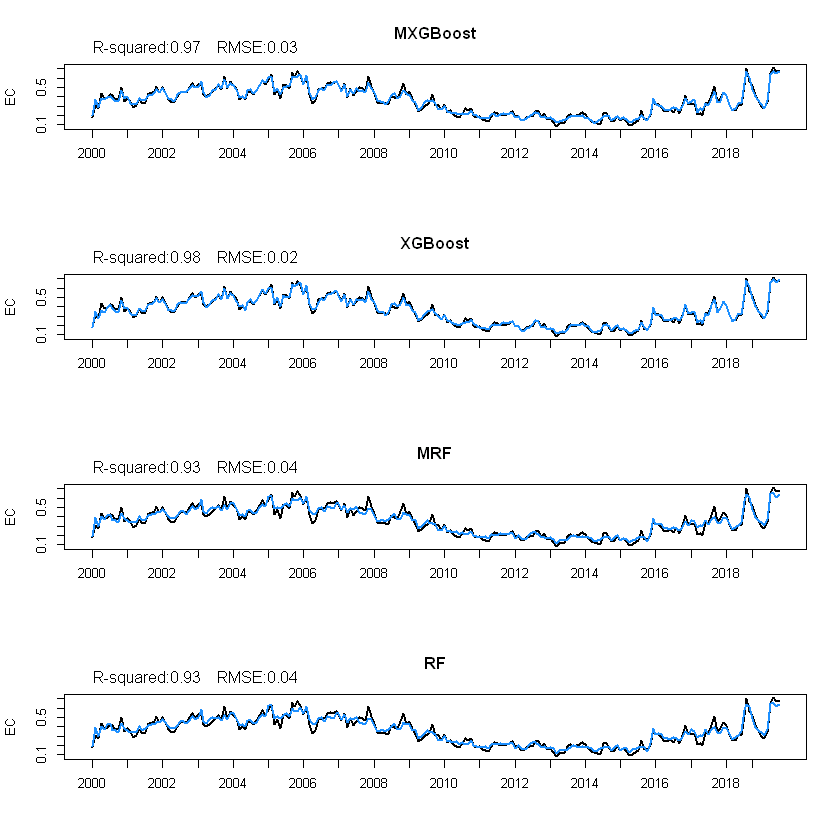

In [11]:
par(mfrow = c(4,1))
TracePlt(comp = "ec",  Mod = "MXGBoost")
TracePlt(comp = "ec",  Mod = "XGBoost")
TracePlt(comp = "ec",  Mod = "MRF")
TracePlt(comp = "ec",  Mod = "RF")

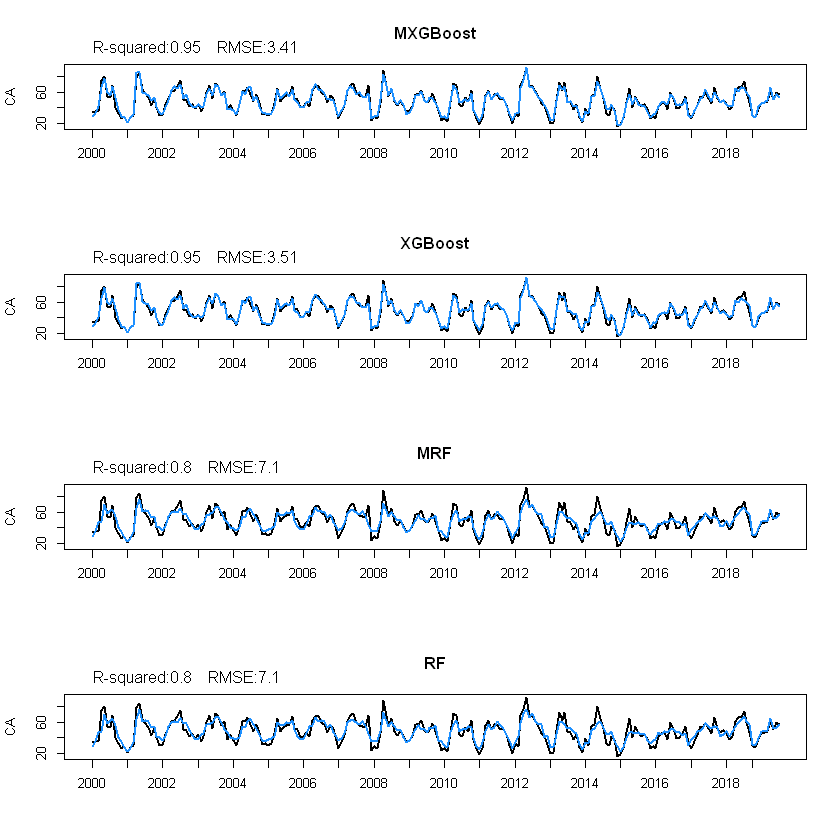

In [12]:
par(mfrow = c(4,1))
TracePlt(comp = "ca",  Mod = "MXGBoost")
TracePlt(comp = "ca",  Mod = "XGBoost")
TracePlt(comp = "ca",  Mod = "MRF")
TracePlt(comp = "ca",  Mod = "RF")